
# NAME : ANANYA MEHTA

# PRN : 22070126009



# Applied logistics Regression with accuracy 80% and precision 71%


In [272]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
data = pd.read_csv('diabetes2.csv')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [275]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

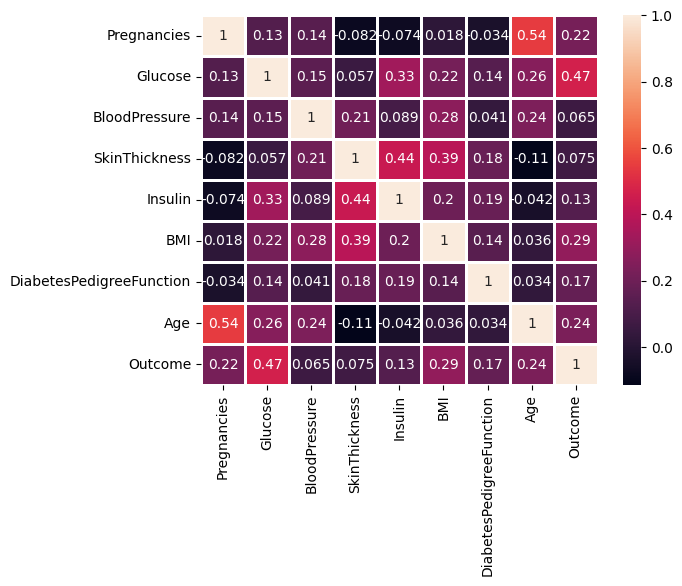

In [276]:
sns.heatmap(data.corr(), annot=True, linewidth=2)

In [277]:
# observation -> here, BloodPressure and SkinThickness is low correlation, so don't consider these two columns as features

In [278]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

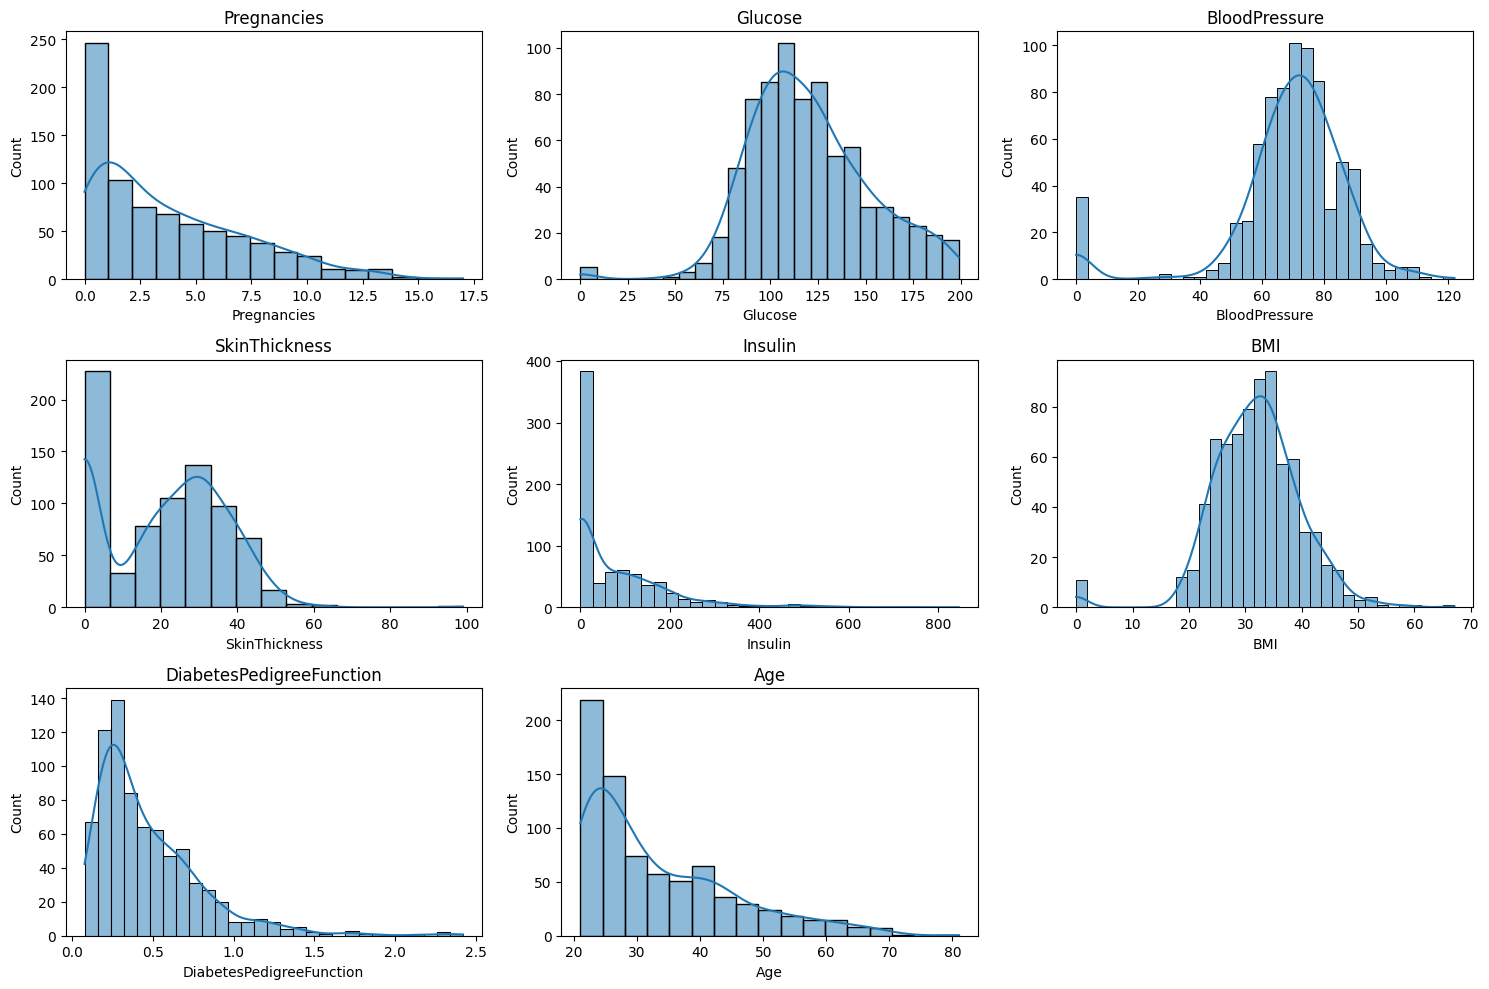

In [279]:
#EDA
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
plt.figure(figsize=(15, 10))
for i, column in enumerate(column_names[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

In [280]:
# data = data.drop(columns=['Glucose', 'SkinThickness'])


In [281]:
# Count and percentage of 0 values in each column
zero_counts = data.eq(0).sum()
percent_zeros = (zero_counts / len(data)) * 100

# Display the results
print("Count and Percentage of 0 values in each column:")
for col in data.columns:
    print(f"{col}: Count={zero_counts[col]}, Percentage={percent_zeros[col]:.2f}%")


Count and Percentage of 0 values in each column:
Pregnancies: Count=111, Percentage=14.45%
Glucose: Count=5, Percentage=0.65%
BloodPressure: Count=35, Percentage=4.56%
SkinThickness: Count=227, Percentage=29.56%
Insulin: Count=374, Percentage=48.70%
BMI: Count=11, Percentage=1.43%
DiabetesPedigreeFunction: Count=0, Percentage=0.00%
Age: Count=0, Percentage=0.00%
Outcome: Count=500, Percentage=65.10%


In [282]:
data['Insulin'] = data['Insulin'].replace(0, np.nan)

In [283]:
data['Insulin'].isnull().sum()

374

In [284]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming data contains your DataFrame with missing values

# Select columns for imputation
columns_to_impute = ['Insulin']

# Scale numerical features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[columns_to_impute])

# Apply KNN imputation
imputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit_transform(scaled_data)


# Inverse transform scaled data to get original values
original_data = scaler.inverse_transform(imputed_data)

# Convert back to DataFrame
imputed_df = pd.DataFrame(original_data, columns=columns_to_impute)


# Display the DataFrame with imputed values
print(imputed_df)



        Insulin
0    155.548223
1    155.548223
2    155.548223
3     94.000000
4    168.000000
..          ...
763  180.000000
764  155.548223
765  112.000000
766  155.548223
767  155.548223

[768 rows x 1 columns]


In [285]:
# Count and percentage of 0 values in each column
zero_counts = imputed_df.eq(0).sum()
percent_zeros = (zero_counts / len(imputed_df)) * 100

# Display the results
print("Count and Percentage of 0 values in each column:")
for col in imputed_df.columns:
    print(f"{col}: Count={zero_counts[col]}, Percentage={percent_zeros[col]:.2f}%")

Count and Percentage of 0 values in each column:
Insulin: Count=0, Percentage=0.00%


In [286]:

data['Insulin']=imputed_df['Insulin']

In [287]:
# Calculate the mean of non-zero values in the 'Glucose' column
glucose_mean = data.loc[data['Glucose'] != 0, 'Glucose'].mean()

# Replace 0 values in 'Glucose' column with the mean of non-zero values
data['Glucose'] = data['Glucose'].replace(0, glucose_mean)

In [288]:
# Calculate the mean of non-zero values in the 'Glucose' column
BMI_mean = data.loc[data['BMI'] != 0, 'BMI'].mean()

# Replace 0 values in 'Glucose' column with the mean of non-zero values
data['BMI'] = data['BMI'].replace(0, BMI_mean)

In [289]:
# Count and percentage of 0 values in each column
zero_counts = data.eq(0).sum()
percent_zeros = (zero_counts / len(data)) * 100

# Display the results
print("Count and Percentage of 0 values in each column:")
for col in data.columns:
    print(f"{col}: Count={zero_counts[col]}, Percentage={percent_zeros[col]:.2f}%")


Count and Percentage of 0 values in each column:
Pregnancies: Count=111, Percentage=14.45%
Glucose: Count=0, Percentage=0.00%
BloodPressure: Count=35, Percentage=4.56%
SkinThickness: Count=227, Percentage=29.56%
Insulin: Count=0, Percentage=0.00%
BMI: Count=0, Percentage=0.00%
DiabetesPedigreeFunction: Count=0, Percentage=0.00%
Age: Count=0, Percentage=0.00%
Outcome: Count=500, Percentage=65.10%


<Axes: >

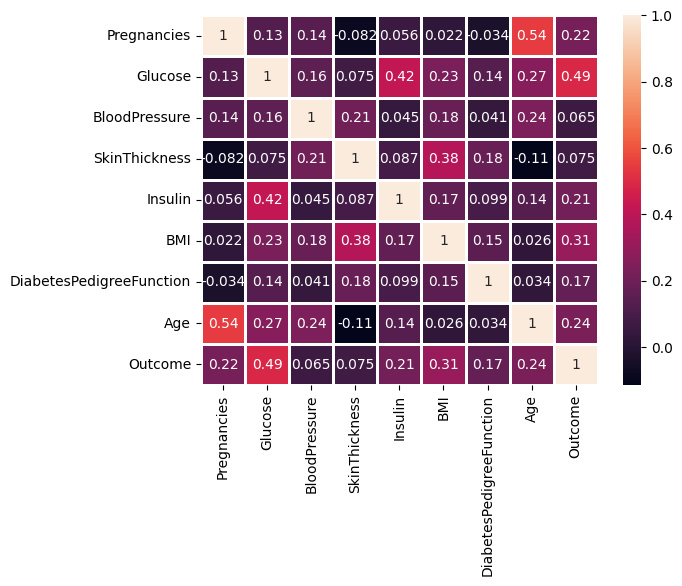

In [295]:
sns.heatmap(data.corr(), annot=True, linewidth=2)

In [290]:
# selecting features and labels
feature_columns = ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
x = data[feature_columns]                   # independent variable
y = data['Outcome']                         # dependent variable

In [291]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [292]:
# using LogisticRegression function
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()                   # object

log_reg.fit(x_train, y_train)                    # fit the model with data
y_pred = log_reg.predict(x_test)                 # prediction

In [294]:
# Confusion Matrix Evaluation Metrics
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', metrics.precision_score(y_test, y_pred))
print('Classification report: \n', metrics.classification_report(y_test, y_pred))



Accuracy:  0.8051948051948052
Precision:  0.717948717948718
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.72      0.60      0.65        47

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154

